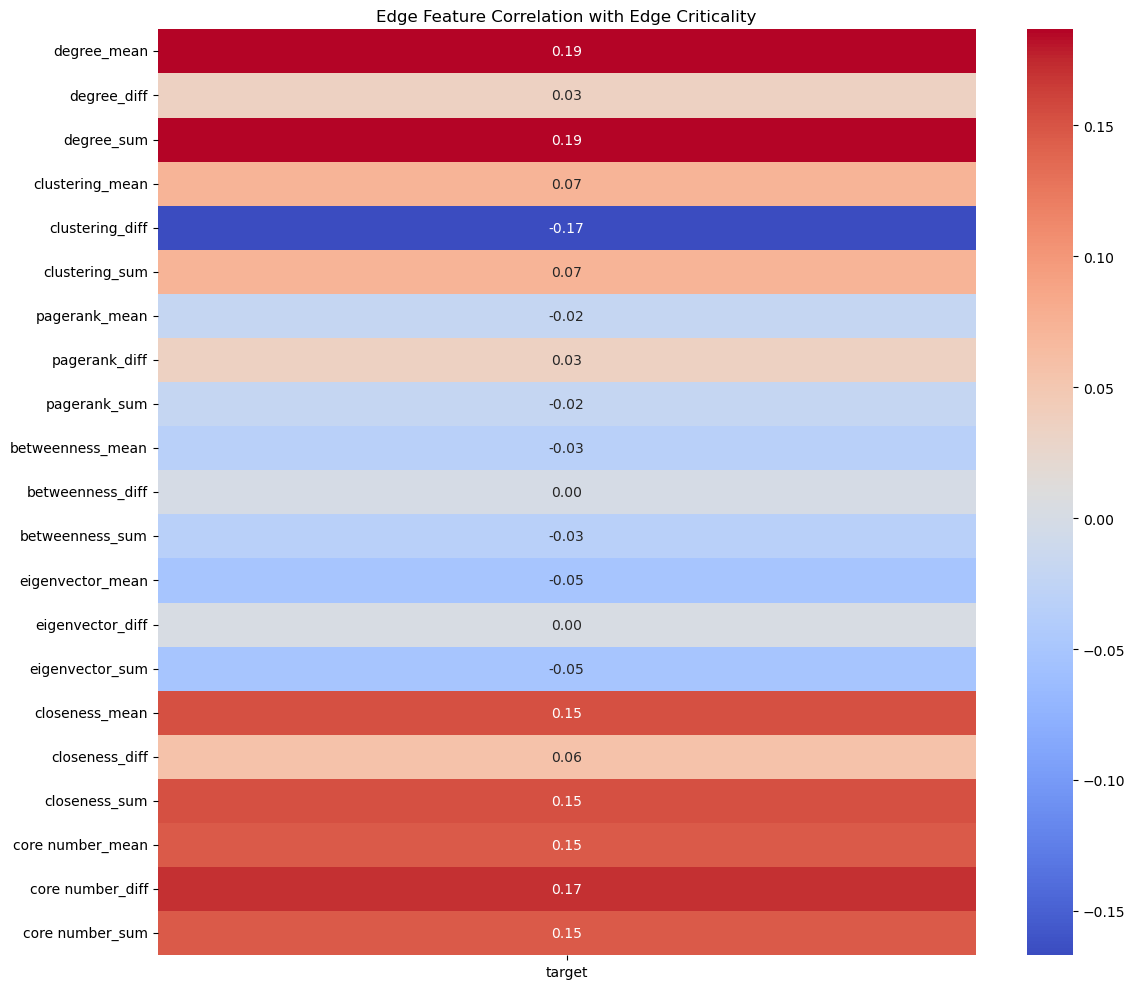


Top correlated features with edge-level target (Pearson):
degree_mean         0.186631
degree_sum          0.186631
core number_diff    0.171431
closeness_mean      0.152812
closeness_sum       0.152812
core number_mean    0.145585
core number_sum     0.145585
clustering_sum      0.073207
clustering_mean     0.073207
closeness_diff      0.055772
degree_diff         0.034831
pagerank_diff       0.034738
eigenvector_diff    0.001695
betweenness_diff    0.000100
pagerank_sum       -0.020472
pagerank_mean      -0.020472
betweenness_mean   -0.033844
betweenness_sum    -0.033844
eigenvector_mean   -0.052246
eigenvector_sum    -0.052246
clustering_diff    -0.166956
Name: target, dtype: float64


In [6]:
import torch
import pandas as pd
import numpy as np
from edge_criticality_dataset import EdgeCriticalityDataset
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

features_to_test = ["degree", "clustering", "pagerank", "betweenness", "eigenvector", "closeness", "core number"]

dataset = EdgeCriticalityDataset(
    path="../dataset_generator/precalculated_features_network_criticality.pt",
    metric_name="network_criticality",
    features=features_to_test
)

rows = []

for i in range(len(dataset)):
    data = dataset.get(i)
    x = data.x.numpy()                     # shape: [num_nodes, num_features]
    y = data.y.numpy()                     # shape: [num_edges]
    edge_index = data.edge_index.numpy()   # shape: [2, num_edges]

    src_nodes = edge_index[0]
    tgt_nodes = edge_index[1]

    for j in range(edge_index.shape[1]):
        f_src = x[src_nodes[j]]
        f_tgt = x[tgt_nodes[j]]

        row = {
            "target": y[j]
        }

        # Create combined features (mean of endpoints)
        for k, feat in enumerate(features_to_test):
            row[f"{feat}_mean"] = ((f_src[k] + f_tgt[k]) / 2)
            row[f"{feat}_diff"] = abs(f_src[k] - f_tgt[k])
            row[f"{feat}_sum"] = (f_src[k] + f_tgt[k])

        rows.append(row)

# DataFrame of edge features
df = pd.DataFrame(rows)

# Correlation with target
corr_matrix = df.corr(method='pearson')

# Visualize top features
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['target']].drop('target'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Edge Feature Correlation with Edge Criticality")
plt.tight_layout()
plt.show()

# Print ranked correlations
print("\nTop correlated features with edge-level target (Pearson):")
print(corr_matrix['target'].drop('target').sort_values(ascending=False))
